In [1]:
import pandas as pd
import numpy as np

In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
print("Data read into a pandas dataframe!")

Data read into a pandas dataframe!


In [3]:
df_can.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


Let's set Country as the index, it will help you to plot the charts easily, by refering to the country names as index value

In [4]:
df_can.set_index('Country', inplace = True)
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [5]:
years = list(map(str, range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Visualizing Data using Matplotlib

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
# optional: check if matplotlib is loaded
print("Matplotlib version : ", mpl.__version__)

Matplotlib version :  3.7.2


In [8]:
# optional: apply a style to Matplotlib
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [9]:
mpl.style.use(['fivethirtyeight'])

## Line Plot
In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

Question: Plot a line graph of immigration from Haiti using df.plot().

In [10]:
#creating data series
haiti = df_can.loc['Haiti', years]
haiti.head(3)

1980    1666
1981    3692
1982    3498
Name: Haiti, dtype: object

<Axes: >

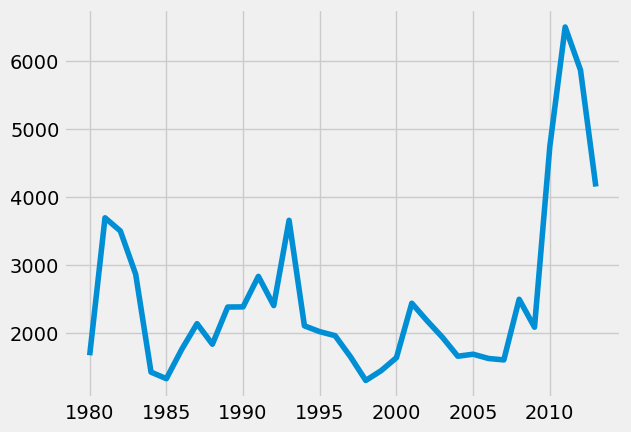

In [11]:
haiti.plot()

Text(0.5, 0, 'Years')

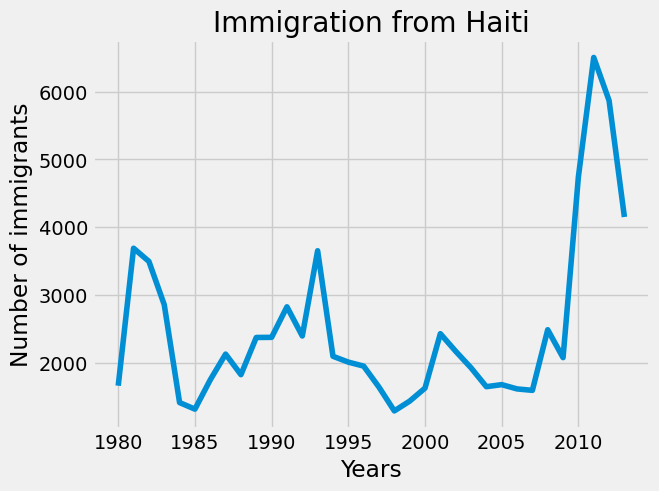

In [12]:
haiti.plot(kind='line')

plt.title("Immigration from Haiti")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the plt.text() method.

However, notice that years are of type string. Let's change the type of the index values to integer first.

Text(2001, 6000, '2010 Earthquake')

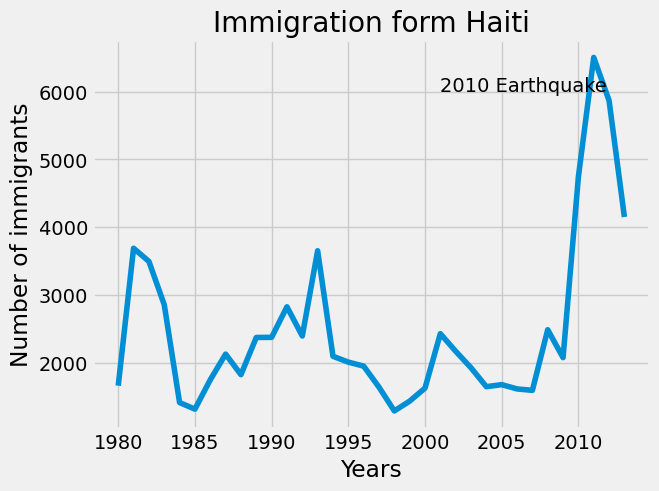

In [13]:
haiti.index = haiti.index.map(int)
haiti.plot(kind = 'line')

plt.title("Immigration form Haiti")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")

# annotate the 2010 Earthquake
# syntax : plt.text(x,y,label)
plt.text(2001,6000, "2010 Earthquake")

Quick note on x and y values in plt.text(x, y, label):

 Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
    plt.text(2000, 6000, '2010 Earthquake') # years stored as type int

If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.
    plt.text(20, 6000, '2010 Earthquake') 

##### Question: Let's compare the number of immigrants from India and China from 1980 to 2013.

Step1: Get the data set for China and India, and display the dataframe

In [21]:
df_CI = df_can.loc[['China','India'], years]
df_CI

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


Step2: Plot the graph

<Axes: xlabel='Country'>

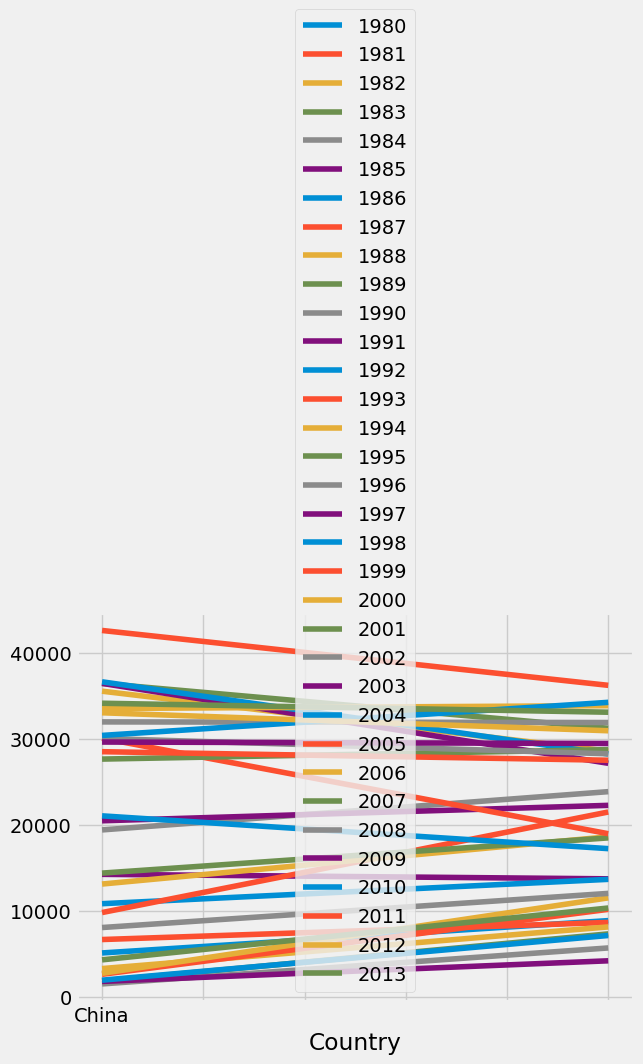

In [22]:
df_CI.plot(kind = 'line')

That doesn't look right!
Since df_CI is a dataframe with Country as index and years as coulumns, we must first transpose the dataframe using 
### The 'transpose()' method to swap rows and columns.

In [23]:
df_CI = df_CI.transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Text(0.5, 0, 'Years')

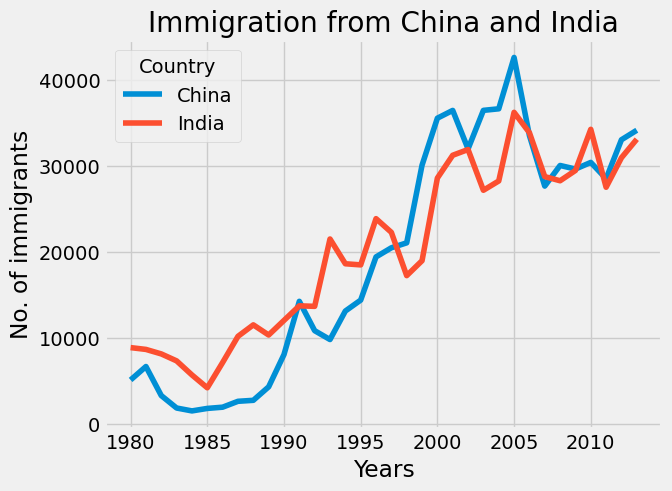

In [24]:
df_CI.index = df_CI.index.map(int)
df_CI.plot(kind = 'line')

plt.title("Immigration from China and India")
plt.ylabel("No. of immigrants")
plt.xlabel("Years")

#### Question: Compare the trend of top 5 countries that contributed the most to immigration to Canada.

<Axes: >

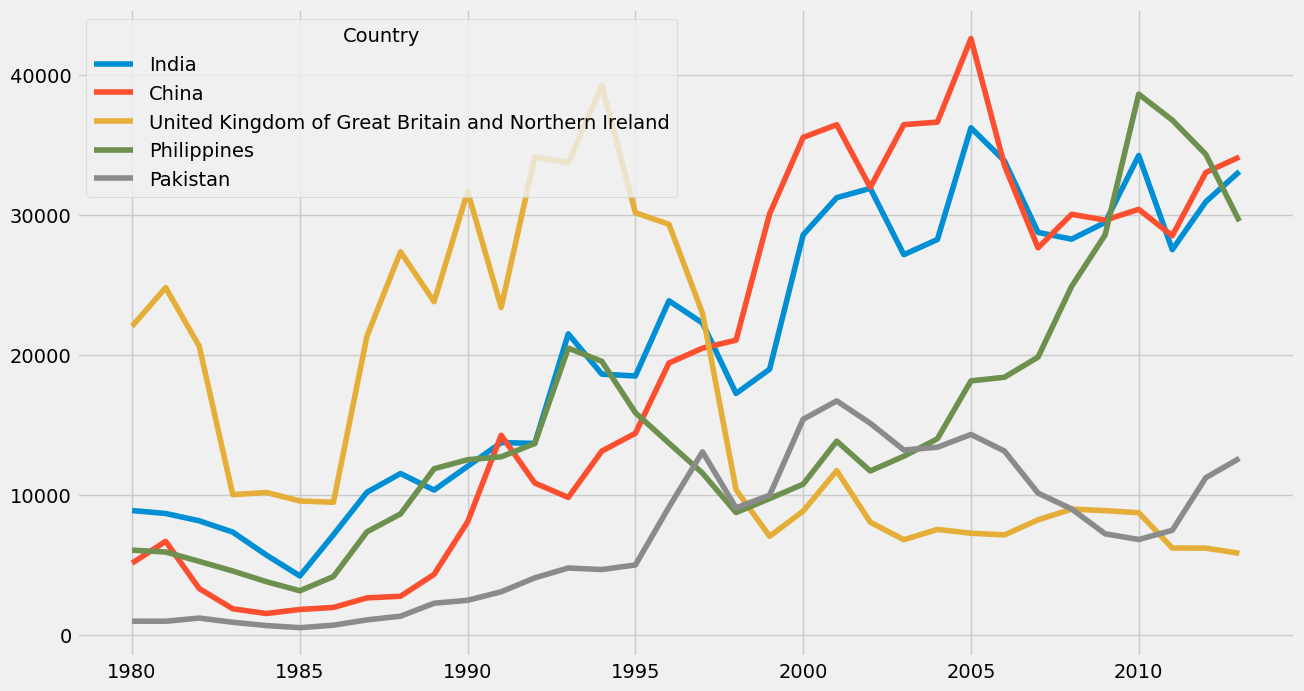

In [31]:
df_can.sort_values(by = 'Total', axis = 0, ascending = False, inplace = True)
top5 = df_can.head(5)
top5 = top5[years].transpose()
top5.index = top5.index.map(int)
top5.plot(kind = 'line', figsize = (14,8))